# NYC Airbnb Data Preprocessing and Regression

In [1]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [3]:
#Importing Airbnb dataset from excel
data = pd.read_excel("/Users/ashutoshshanker/Downloads/Airbnb_V1_clean.xlsx")

In [4]:
data.head(5)

,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",2845,Jennifer,2008-09-09,"New York, New York, United States",within a day,0.83,0.24,...,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0,2,0.37
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,0.94,0.96,...,349,89.0,8.0,9.0,9.0,9.0,9.0,9.0,1,4.82
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,7356,Garon,2009-02-03,"New York, New York, United States",NaN,NaN,1.00,...,50,90.0,8.0,8.0,10.0,10.0,9.0,9.0,1,0.36
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,7378,Rebecca,2009-02-03,"New York, New York, United States",within a few hours,1.00,NaN,...,1,97.0,10.0,10.0,10.0,10.0,8.0,10.0,1,0.01
4,5178,Large Furnished Room Near B'wayã€€,Please donâ€™t expect the luxury here just a b...,8967,Shunichi,2009-03-03,"New York, New York, United States",within a few hours,1.00,1.00,...,473,84.0,9.0,7.0,9.0,9.0,10.0,9.0,1,3.42


In [5]:
data.id.head(5)

0    2595
1    3831
2    5121
3    5136
4    5178
Name: id, dtype: int64

In [6]:
# Dataset description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,45756.0,2.309535e+07,1.382572e+07,2595.00000,1.061546e+07,2.224709e+07,3.593987e+07,4.533040e+07
host_id,45756.0,8.437272e+07,9.920451e+07,2438.00000,9.250917e+06,3.726838e+07,1.359344e+08,3.665571e+08
host_response_rate,21908.0,8.729870e-01,2.599574e-01,0.00000,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,29228.0,8.048460e-01,2.771249e-01,0.00000,7.200000e-01,9.400000e-01,1.000000e+00,1.000000e+00
latitude,45756.0,4.072963e+01,5.502481e-02,40.50868,4.069003e+01,4.072455e+01,4.076316e+01,4.091214e+01
longitude,45756.0,-7.395075e+01,4.777557e-02,-74.23986,-7.398315e+01,-7.395539e+01,-7.393399e+01,-7.371299e+01
accommodates,45756.0,2.773429e+00,1.818494e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,41349.0,1.292945e+00,6.837461e-01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01
beds,45251.0,1.511083e+00,1.100529e+00,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01
price,45756.0,1.495575e+02,3.153679e+02,0.00000,6.500000e+01,1.000000e+02,1.600000e+02,1.000000e+04


In [7]:
# Columns with number and percentage of missing data
percentage_missing_data = pd.DataFrame([data.isnull().sum(), data.isnull().sum() * 100.0/data.shape[0]]).T
percentage_missing_data.columns = ['No. of Missing Data', 'Percentage of Missing data']
percentage_missing_data

,No. of Missing Data,Percentage of Missing data
id,0.0,0.000000
name,21.0,0.045896
description,1349.0,2.948247
host_id,0.0,0.000000
host_name,15.0,0.032783
host_since,14.0,0.030597
host_location,139.0,0.303785
host_response_time,23848.0,52.119941
host_response_rate,23848.0,52.119941
host_acceptance_rate,16528.0,36.122039


In [8]:
# Processing 'host_since' columns
data['host_since']= pd.to_datetime(data['host_since'])
data['host_since_year']=pd.DatetimeIndex(data['host_since']).year

In [9]:
# Binning 'host_since' columns
cut_labels_hyear = ['2008-2010', '2010-2012', '2012-2014', '2014-2016','2016-2018','2018-2020']
cut_bins_hyear = [2008.0, 2010.0, 2012.0, 2014.0, 2016.0, 2018.0, 2020.0]
data['binned_hyear'] = pd.cut(data['host_since_year'], bins=cut_bins_hyear, labels=cut_labels_hyear, include_lowest= True)

In [10]:
# Deleting rows with null values
data = data.dropna(axis=0, subset=['host_since'])

In [11]:
# Counting number of elements in 'host_verifications' columns
host_verifications_count = []
for i in data["host_verifications"].items():
    host_verifications_count.append(i[1].count(',')+1)

data["host_verifications_count"] = host_verifications_count

In [12]:
# Binning 'host_verifications' columns
labels_host_verifications_count = ['0-4','5-8','9 above']
bins_host_verifications_count = [0,4,8,np.inf]
data['binned_host_verifications_count'] = pd.cut(data['host_verifications_count'], bins_host_verifications_count, labels=labels_host_verifications_count, include_lowest= True)


In [13]:
data['binned_host_verifications_count'].value_counts()

5-8        27911
0-4        15302
9 above     2529
Name: binned_host_verifications_count, dtype: int64

In [14]:
# Binning 'accommodates' columns
bins_accomodate = [0, 1, 2, 3, 4, 5, 6, np.inf]
labels_accomodate =[1,2,3,4,5,6,'7 above']
data['binned_accomodate'] = pd.cut(data['accommodates'], bins_accomodate, labels=labels_accomodate)

In [15]:
data['binned_accomodate'].value_counts()

2          21274
1           7516
4           6837
3           4804
6           2075
5           1715
7 above     1515
Name: binned_accomodate, dtype: int64

In [16]:
# Replacing null values with 0
data['bedrooms'] = data['bedrooms'].replace(np.nan, 0)
data['beds'] = data['beds'].replace(np.nan, 0)

In [17]:
# Binning 'bedrooms' columns
bins_bedrooms = [0, 1, 2, 3, 4, 5,np.inf]
labels_bedrooms =[1,2,3,4,5,'5 above']
data['binned_bedrooms'] = pd.cut(data['bedrooms'], bins_bedrooms, labels=labels_bedrooms, include_lowest= True)

In [18]:
# Binning 'beds' columns
bins_beds = [0,1, 2, 3, 4, np.inf]
labels_beds =[1,2,3,4,'5 above']
data['binned_beds'] = pd.cut(data['beds'], bins_beds, labels=labels_beds, include_lowest= True)

In [19]:
# Binning 'price' columns
labels_price = ['<=100', '>100']
bins_price = [0, 100.00,np.inf]
data['binned_price'] = pd.cut(data['price'], bins=bins_price, labels=labels_price, include_lowest= True)

In [20]:
data[['price','binned_price']].head()

,price,binned_price
0,175.0,>100
1,76.0,<=100
2,60.0,<=100
3,175.0,>100
4,79.0,<=100


In [21]:
# Counting number of elements in 'amenities' columns
amenities_count = []
for i in data["amenities"].items():
    amenities_count.append(i[1].count(',')+1)

data["amenities_count"] = amenities_count
data["amenities_count"]

0        31
1        35
2         4
3        10
4        18
         ..
45751    17
45752    21
45753    19
45754    16
45755    14
Name: amenities_count, Length: 45742, dtype: int64

In [22]:
# Binning 'amenities' columns
labels_amenities_count = ['0-10','11-20','21-30','31-40','41-50','51-60','60 above']
bins_amenities_count = [0,10,20,30,40,50,60,np.inf]
data['binned_amenities_count'] = pd.cut(data['amenities_count'], bins_amenities_count, labels=labels_amenities_count, include_lowest= True)


In [23]:
# Splitting column 'bathrooms_text' into 'bathrooms_count' and 'bathrooms_type'
data[['bathrooms_count','bathrooms_type']] = pd.DataFrame([x.split(' ') for x in data['bathrooms_text'].tolist()])

In [24]:
data["bathrooms_count"].unique()

array(['1', '', '1.5', '0.5', '2', '3.5', '3', '2.5', '0', '5', '4.5',
       '5.5', '4', '15.5', '6', '8', '6.5', '7.5', '7', nan], dtype=object)

In [25]:
data["bathrooms_type"].unique()

array(['bath', '', 'baths', 'shared', 'private', 'Shared', 'Private', nan],
      dtype=object)

In [26]:
# Replacing nan and spaces with 0:
data['bathrooms_count'] = data['bathrooms_count'].replace(np.nan, 0)
data['bathrooms_count'] = data['bathrooms_count'].replace('', 0)
data['bathrooms_type'] = data['bathrooms_type'].replace('', 0)

In [27]:
data["bathrooms_count"] = data.bathrooms_count.astype(float)

In [28]:
# Binning 'bathrooms_type' columns
value_dict_bathrooms_type  = {'bath':'Private','private':'Private','Private':'Private','baths':'Shared','shared':'Shared','Shared':'Shared',0:'Shared'}
data["binned_bathrooms_type"] = data["bathrooms_type"].replace(value_dict_bathrooms_type)

In [29]:
# Binning 'bathrooms_count' columns
labels_bathrooms_count = ['0-1', '1.5-2', '2.5-3', '3.5-4','4 above']
bins_bathrooms_count = [0, 1.0, 2.0, 3.0, 4.0, np.inf]
data['binned_bathrooms_count'] = pd.cut(data['bathrooms_count'], bins=bins_bathrooms_count, labels=labels_bathrooms_count, include_lowest= True)

In [30]:
# Replacing na with median:
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].median())
data['review_scores_accuracy'] = data['review_scores_accuracy'].fillna(data['review_scores_accuracy'].median())
data['review_scores_cleanliness'] = data['review_scores_cleanliness'].fillna(data['review_scores_cleanliness'].median())
data['review_scores_checkin'] = data['review_scores_checkin'].fillna(data['review_scores_checkin'].median())
data['review_scores_communication'] = data['review_scores_accuracy'].fillna(data['review_scores_accuracy'].median())
data['review_scores_location'] = data['review_scores_accuracy'].fillna(data['review_scores_accuracy'].median())
data['review_scores_value'] = data['review_scores_value'].fillna(data['review_scores_value'].median())

In [31]:
# Binning 'availability_365' columns
cut_labels_avail = ['Less than 2 months', '2 - 4 months', '4 - 6 months', '6 - 8 months','8 - 10 months','More than 10 months']
cut_bins_avail = [0, 60, 120, 180, 240, 300, 366]
data['binned_avail365'] = pd.cut(data['availability_365'], bins=cut_bins_avail, labels=cut_labels_avail, include_lowest= True)

In [32]:
# Binning 'number_of_reviews' columns
cut_labels_review = ['None', '1 - 5 reviews', 'More than 5 reviews']
cut_bins_review = [0, 1, 5, 746]
data['binned_no_of_reviews'] = pd.cut(data['number_of_reviews'], bins=cut_bins_review, labels=cut_labels_review, include_lowest= True)

In [33]:
# Binning 'review_scores_rating' columns
cut_labels_review_rat = ['<=90', '>90']
cut_bins_review_rat = [0, 90, 100]
data['binned_review_rating'] = pd.cut(data['review_scores_rating'], bins=cut_bins_review_rat, labels=cut_labels_review_rat, include_lowest= True)

In [34]:
# Binning 'review_scores_accuracy' columns
cut_labels_review_acc = ['<=9', '>9']
cut_bins_review_acc = [0, 9, 10]
data['binned_review_acc'] = pd.cut(data['review_scores_accuracy'], bins=cut_bins_review_acc, labels=cut_labels_review_acc, include_lowest= True)

In [35]:
# Binning 'review_scores_cleanliness' columns
cut_labels_review_clean = ['<=9', '>9']
cut_bins_review_clean = [0, 9, 10]
data['binned_review_clean'] = pd.cut(data['review_scores_cleanliness'], bins=cut_bins_review_clean, labels=cut_labels_review_clean, include_lowest= True)

In [36]:
# Binning 'review_scores_checkin' columns
cut_labels_review_check = ['<=9', '>9']
cut_bins_review_check = [0, 9, 10]
data['binned_review_checkin'] = pd.cut(data['review_scores_checkin'], bins=cut_bins_review_check, labels=cut_labels_review_check, include_lowest= True)

In [37]:
# Binning 'review_scores_communication' columns
cut_labels_review_comm = ['<=9', '>9']
cut_bins_review_comm = [0, 9, 10]
data['binned_review_comm'] = pd.cut(data['review_scores_communication'], bins=cut_bins_review_comm, labels=cut_labels_review_comm, include_lowest= True)

In [38]:
# Binning 'review_scores_location' columns
cut_labels_review_loc = ['<=9', '>9']
cut_bins_review_loc = [0, 9, 10]
data['binned_review_loc'] = pd.cut(data['review_scores_location'], bins=cut_bins_review_loc, labels=cut_labels_review_loc, include_lowest= True)

In [39]:
# Binning 'review_scores_value' columns
cut_labels_review_val = ['<=9', '>9']
cut_bins_review_val = [0, 9, 10]
data['binned_review_ val'] = pd.cut(data['review_scores_value'], bins=cut_bins_review_val, labels=cut_labels_review_val, include_lowest= True)

In [40]:
# Binning 'calculated_host_listings_count' columns
cut_labels_host_list_count = ['Single', 'Multiple']
cut_bins_host_list_count = [0, 1, 239]
data['binned_host_list_count'] = pd.cut(data['calculated_host_listings_count'], bins=cut_bins_host_list_count, labels=cut_labels_host_list_count, include_lowest= True)

In [41]:
t_amenities = []
for amenities in data.amenities:
    t_amenities.append(amenities)

def amenities_split(amenities):
    split_n = str(amenities).split(',')
    return split_n

t_amenities_count = []
for i in t_amenities:
    for word in amenities_split(i):
        word = re.sub(r'[^\w\s]','',word)
        word = word.lower().strip()
        t_amenities_count.append(word)

In [42]:
from collections import Counter

Top_words=Counter(t_amenities_count).most_common()
Top_words=Top_words[0:]

In [43]:
Top_words

[('wifi', 44373),
 ('heating', 42795),
 ('essentials', 41788),
 ('kitchen', 41575),
 ('smoke alarm', 39956),
 ('air conditioning', 38860),
 ('hangers', 33823),
 ('carbon monoxide alarm', 32376),
 ('tv', 31449),
 ('shampoo', 29815),
 ('hair dryer', 29209),
 ('laptopfriendly workspace', 28730),
 ('iron', 28080),
 ('hot water', 25246),
 ('refrigerator', 19879),
 ('dishes and silverware', 19283),
 ('washer', 18956),
 ('dryer', 18603),
 ('fire extinguisher', 17360),
 ('microwave', 16780),
 ('cooking basics', 16685),
 ('stove', 16623),
 ('oven', 16238),
 ('free street parking', 15961),
 ('first aid kit', 15362),
 ('coffee maker', 15312),
 ('bed linens', 14553),
 ('elevator', 11801),
 ('lock on bedroom door', 11384),
 ('cable tv', 10438),
 ('extra pillows and blankets', 10309),
 ('private entrance', 9846),
 ('long term stays allowed', 9134),
 ('dishwasher', 7407),
 ('luggage dropoff allowed', 7291),
 ('host greets you', 6026),
 ('lockbox', 5428),
 ('gym', 4632),
 ('paid parking off premises',

In [44]:
sub_words = pd.DataFrame(Top_words)
sub_words.rename(columns = {0:'Amenities',1:'Count'}, inplace=True)

In [45]:
sub_words = sub_words.iloc[::-1]

In [46]:
sub_words["Amenities"] = sub_words["Amenities"].str.replace('[^\w\s]','')

In [47]:
#Ranking the amenities based on the number of occurance
sub_words.loc[sub_words['Amenities'] == '', 'Count'] = 0
sub_words['dense_rank'] = sub_words['Count'].rank(method='dense')

In [48]:
sub_words

,Amenities,Count,dense_rank
189,le labo toiletries,1,2.0
188,onsite restaurant u2014 parker quinn,1,2.0
187,bathrobes,1,2.0
186,linens,1,2.0
185,limited housekeeping u2014 on request,1,2.0
...,...,...,...
4,smoke alarm,39956,92.0
3,kitchen,41575,93.0
2,essentials,41788,94.0
1,heating,42795,95.0


In [49]:
# Giving weighted score to the Amenities
sub_words['score'] = sub_words['Count'] * sub_words['dense_rank']
sub_words

,Amenities,Count,dense_rank,score
189,le labo toiletries,1,2.0,2.0
188,onsite restaurant u2014 parker quinn,1,2.0,2.0
187,bathrobes,1,2.0,2.0
186,linens,1,2.0,2.0
185,limited housekeeping u2014 on request,1,2.0,2.0
...,...,...,...,...
4,smoke alarm,39956,92.0,3675952.0
3,kitchen,41575,93.0,3866475.0
2,essentials,41788,94.0,3928072.0
1,heating,42795,95.0,4065525.0


In [50]:
dict_score = dict(zip(sub_words.Amenities, sub_words.score))
dict_score

{'le labo toiletries': 2.0,
 'onsite restaurant u2014 parker  quinn': 2.0,
 'bathrobes': 2.0,
 'linens': 2.0,
 'limited housekeeping u2014 on request': 2.0,
 '32 tv': 2.0,
 'hot breakfast available u2014 20 per person per day': 2.0,
 'housekeeping': 2.0,
 'onsite bar u2014 molyvos restaurant  bar': 2.0,
 'onsite restaurant u2014 park cafe': 2.0,
 '1802 beekman toiletries': 2.0,
 'selfparking u2014 37day': 2.0,
 '49 hdtv with netflix': 2.0,
 'valet parking u2014 55day': 2.0,
 'cookedtoorder breakfast available for a fee': 2.0,
 'seasonal': 2.0,
 'outdoor pool': 2.0,
 'onsite restaurant u2014 blue ribbon sushi izakaya': 2.0,
 'bose sound system': 2.0,
 'tv with premium cable': 2.0,
 'sferra linens': 2.0,
 'onsite rooftop bar u2014 make believe': 2.0,
 'onsite restaurant u2014 above sixty soho': 2.0,
 'hdtv': 2.0,
 'valet parking u2014 80day': 2.0,
 'mini fridge': 2.0,
 'cote bastide argan toiletries': 2.0,
 'valet parking u2014 75day': 2.0,
 'onsite restaurant u2014 cafu00e9 hugo': 2.0,


In [51]:
dict_rank = dict(zip(sub_words.Amenities, sub_words.dense_rank))
dict_rank

{'le labo toiletries': 2.0,
 'onsite restaurant u2014 parker  quinn': 2.0,
 'bathrobes': 2.0,
 'linens': 2.0,
 'limited housekeeping u2014 on request': 2.0,
 '32 tv': 2.0,
 'hot breakfast available u2014 20 per person per day': 2.0,
 'housekeeping': 2.0,
 'onsite bar u2014 molyvos restaurant  bar': 2.0,
 'onsite restaurant u2014 park cafe': 2.0,
 '1802 beekman toiletries': 2.0,
 'selfparking u2014 37day': 2.0,
 '49 hdtv with netflix': 2.0,
 'valet parking u2014 55day': 2.0,
 'cookedtoorder breakfast available for a fee': 2.0,
 'seasonal': 2.0,
 'outdoor pool': 2.0,
 'onsite restaurant u2014 blue ribbon sushi izakaya': 2.0,
 'bose sound system': 2.0,
 'tv with premium cable': 2.0,
 'sferra linens': 2.0,
 'onsite rooftop bar u2014 make believe': 2.0,
 'onsite restaurant u2014 above sixty soho': 2.0,
 'hdtv': 2.0,
 'valet parking u2014 80day': 2.0,
 'mini fridge': 2.0,
 'cote bastide argan toiletries': 2.0,
 'valet parking u2014 75day': 2.0,
 'onsite restaurant u2014 cafu00e9 hugo': 2.0,


In [52]:
data["amenities"].head(5)

0    ["Iron", "Cleaning before checkout", "Extra pi...
1    ["Iron", "Extra pillows and blankets", "Smoke ...
2    ["Air conditioning", "Kitchen", "Wifi", "Heati...
3    ["Carbon monoxide alarm", "Dryer", "Cable TV",...
4    ["Refrigerator", "Iron", "Extra pillows and bl...
Name: amenities, dtype: object

In [53]:
# Counting number of elements in 'amenities' columns
import re
amenities_sum = 0
dense_sum = 0
amenities_wgt_score = []

def amenities_split(amenities):
   split_n = str(amenities).split(',')
   return split_n

for i in data["amenities"]:
    
    for word in amenities_split(i):
        word = re.sub(r'[^\w\s]','',word)
        word = word.lower().strip()
        amenities_sum = amenities_sum + dict_score[word]
        dense_sum = dense_sum + dict_rank[word]
    
    wgt_score = (amenities_sum//dense_sum)
    amenities_wgt_score.append(wgt_score)

    amenities_sum = 0
    dense_sum = 0

data["amenities_wgt_score"] = amenities_wgt_score
data["amenities_wgt_score"]

0        23750.0
1        23338.0
2        41941.0
3        33032.0
4        27409.0
          ...   
45751    28122.0
45752    29792.0
45753    27176.0
45754    29091.0
45755    32425.0
Name: amenities_wgt_score, Length: 45742, dtype: float64

In [54]:
data.head(5)

,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,binned_no_of_reviews,binned_review_rating,binned_review_acc,binned_review_clean,binned_review_checkin,binned_review_comm,binned_review_loc,binned_review_ val,binned_host_list_count,amenities_wgt_score
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",2845,Jennifer,2008-09-09,"New York, New York, United States",within a day,0.83,0.24,...,More than 5 reviews,>90,<=9,<=9,>9,<=9,<=9,<=9,Multiple,23750.0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,0.94,0.96,...,More than 5 reviews,<=90,<=9,<=9,<=9,<=9,<=9,<=9,Single,23338.0
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,7356,Garon,2009-02-03,"New York, New York, United States",NaN,NaN,1.00,...,More than 5 reviews,<=90,<=9,<=9,>9,<=9,<=9,<=9,Single,41941.0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,7378,Rebecca,2009-02-03,"New York, New York, United States",within a few hours,1.00,NaN,...,None,>90,>9,>9,>9,>9,>9,>9,Single,33032.0
4,5178,Large Furnished Room Near B'wayã€€,Please donâ€™t expect the luxury here just a b...,8967,Shunichi,2009-03-03,"New York, New York, United States",within a few hours,1.00,1.00,...,More than 5 reviews,<=90,<=9,<=9,<=9,<=9,<=9,<=9,Single,27409.0


In [55]:
data.amenities_wgt_score.mean()

29432.21365484675

In [56]:
sub_words.dtypes

Amenities      object
Count           int64
dense_rank    float64
score         float64
dtype: object

In [57]:
# Counting number of elements in 'amenities' columns
amenities_count = []
for i in data["amenities"].items():
    amenities_count.append(i[1].count(',')+1)

data["amenities_count"] = amenities_count
data["amenities_count"]

0        31
1        35
2         4
3        10
4        18
         ..
45751    17
45752    21
45753    19
45754    16
45755    14
Name: amenities_count, Length: 45742, dtype: int64

In [58]:
# Binning 'amenities_wgt_score' columns
labels_amenities_wgt_score = ['0-8000', '8000-16000', '16000-24000', '24000-32000','32000 above']
bins_amenities_wgt_score = [0, 8000.0, 16000.0, 24000.0, 32000.0, np.inf]
data['binned_amenities_wgt_score'] = pd.cut(data['amenities_wgt_score'], bins=bins_amenities_wgt_score, labels=labels_amenities_wgt_score, include_lowest= True)

In [59]:
data['binned_amenities_wgt_score']

0        16000-24000
1        16000-24000
2        32000 above
3        32000 above
4        24000-32000
            ...     
45751    24000-32000
45752    24000-32000
45753    24000-32000
45754    24000-32000
45755    32000 above
Name: binned_amenities_wgt_score, Length: 45742, dtype: category
Categories (5, object): [0-8000 < 8000-16000 < 16000-24000 < 24000-32000 < 32000 above]

In [60]:
data.head(10)

,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,binned_review_rating,binned_review_acc,binned_review_clean,binned_review_checkin,binned_review_comm,binned_review_loc,binned_review_ val,binned_host_list_count,amenities_wgt_score,binned_amenities_wgt_score
0,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",2845,Jennifer,2008-09-09,"New York, New York, United States",within a day,0.83,0.24,...,>90,<=9,<=9,>9,<=9,<=9,<=9,Multiple,23750.0,16000-24000
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,0.94,0.96,...,<=90,<=9,<=9,<=9,<=9,<=9,<=9,Single,23338.0,16000-24000
2,5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,7356,Garon,2009-02-03,"New York, New York, United States",NaN,NaN,1.00,...,<=90,<=9,<=9,>9,<=9,<=9,<=9,Single,41941.0,32000 above
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,7378,Rebecca,2009-02-03,"New York, New York, United States",within a few hours,1.00,NaN,...,>90,>9,>9,>9,>9,>9,>9,Single,33032.0,32000 above
4,5178,Large Furnished Room Near B'wayã€€,Please donâ€™t expect the luxury here just a b...,8967,Shunichi,2009-03-03,"New York, New York, United States",within a few hours,1.00,1.00,...,<=90,<=9,<=9,<=9,<=9,<=9,<=9,Single,27409.0,24000-32000
5,5203,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",7490,MaryEllen,2009-02-05,"New York, New York, United States",NaN,NaN,NaN,...,>90,>9,>9,>9,>9,>9,>9,Single,27979.0,24000-32000
6,5238,Cute & Cozy Lower East Side 1 bdrm,"Live like a New Yorker instead of a stuffy, ti...",7549,Ben,2009-02-07,"New York, New York, United States",within a few hours,1.00,0.23,...,>90,>9,<=9,>9,>9,>9,<=9,Multiple,27514.0,24000-32000
7,5552,Spacious river view in the West Village,"Beautiful, spacious, light-filled 1-bedroom ap...",8380,Maria,2009-02-22,"New York, New York, United States",within a day,1.00,0.00,...,>90,>9,<=9,>9,>9,>9,>9,Single,27540.0,24000-32000
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental","Discounted now! Beautiful house, gorgeous ga...",9744,Laurie,2009-03-10,"New York, New York, United States",within a few hours,1.00,0.98,...,>90,>9,>9,>9,>9,>9,>9,Multiple,25959.0,24000-32000
9,6021,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,This is a wonderful pre-war apartment full of ...,11528,Claudio,2009-03-27,"New York, New York, United States",within a day,1.00,0.80,...,>90,<=9,>9,>9,<=9,<=9,<=9,Single,26383.0,24000-32000


In [61]:
#data.to_excel('./Preprocessed_Airbnb_V3.1.xlsx')

In [62]:
#data_reg = pd.read_excel("./Airbnb_V1_clean.xlsx")

In [63]:
data_reg = data[['room_type','accommodates','neighbourhood_group_cleansed','beds','bedrooms','calculated_host_listings_count','binned_hyear','amenities_count','availability_365','review_scores_cleanliness','minimum_nights','number_of_reviews','reviews_per_month','price']]

In [64]:
data_reg.fillna({'reviews_per_month':0}, inplace=True)

/Users/ashutoshshanker/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [65]:
percentage_missing_data = pd.DataFrame([data_reg.isnull().sum(), data_reg.isnull().sum() * 100.0/data_reg.shape[0]]).T
percentage_missing_data.columns = ['No. of Missing Data', 'Percentage of Missing data']
percentage_missing_data

,No. of Missing Data,Percentage of Missing data
room_type,0.0,0.0
accommodates,0.0,0.0
neighbourhood_group_cleansed,0.0,0.0
beds,0.0,0.0
bedrooms,0.0,0.0
calculated_host_listings_count,0.0,0.0
binned_hyear,0.0,0.0
amenities_count,0.0,0.0
availability_365,0.0,0.0
review_scores_cleanliness,0.0,0.0


In [66]:
data_reg.head()

,room_type,accommodates,neighbourhood_group_cleansed,beds,bedrooms,calculated_host_listings_count,binned_hyear,amenities_count,availability_365,review_scores_cleanliness,minimum_nights,number_of_reviews,reviews_per_month,price
0,Entire home/apt,2,Manhattan,1.0,0.0,2,2008-2010,31,365,9.0,3,48,0.37,175.0
1,Entire home/apt,3,Brooklyn,3.0,1.0,1,2008-2010,35,272,9.0,1,349,4.82,76.0
2,Private room,2,Brooklyn,1.0,1.0,1,2008-2010,4,365,8.0,29,50,0.36,60.0
3,Entire home/apt,4,Brooklyn,2.0,2.0,1,2008-2010,10,352,10.0,7,1,0.01,175.0
4,Private room,2,Manhattan,1.0,1.0,1,2008-2010,18,346,7.0,2,473,3.42,79.0


Index(['room_type', 'accommodates', 'neighbourhood_group_cleansed', 'beds',
       'bedrooms', 'calculated_host_listings_count', 'binned_hyear',
       'amenities_count', 'availability_365', 'review_scores_cleanliness',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price'],
      dtype='object')

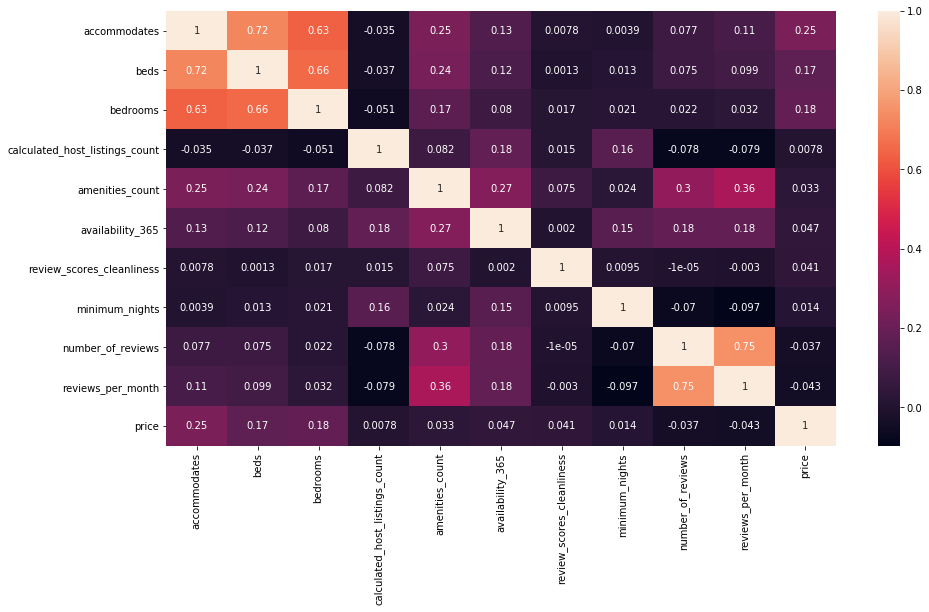

In [67]:
# Correlation between the attributes
corr = data_reg.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data_reg.columns

In [68]:
# One hot encoding on the catgorical columns
dataset_onehot1 = pd.get_dummies(data_reg, columns= ['room_type','neighbourhood_group_cleansed','binned_hyear'], 
                                       prefix = ['rt','ngc','byr'])

In [69]:
#dataset_onehot1.drop(["neighbourhood_cleansed","id","name","description","host_id","host_name","host_since",
#                     "host_location","host_response_time","host_verifications","latitude","longitude",
#                      "property_type","bathrooms_text","amenities","host_since_year","binned_host_verifications_count",
#                      "binned_accomodate","binned_bedrooms","binned_beds","binned_price","binned_amenities_count",
#                      "bathrooms_type","binned_bathrooms_count","binned_avail365","binned_no_of_reviews",
#                      "binned_review_rating","binned_review_acc","binned_review_clean","binned_review_checkin",
#                      "binned_review_comm","binned_review_loc","binned_review_ val","binned_amenities_wgt_score",
#                      "host_response_rate","host_acceptance_rate","reviews_per_month"], axis=1, inplace=True)

In [70]:
dataset_onehot1.shape

(45742, 26)

In [71]:
X1= dataset_onehot1.loc[:, dataset_onehot1.columns != 'price']
Y1= dataset_onehot1["price"]

In [72]:
#dataset_onehot1.to_excel('./Airbnb_onehot.xlsx')

In [73]:
data["binned_hyear"].unique()

[2008-2010, 2010-2012, 2014-2016, 2016-2018, 2012-2014, 2018-2020]
Categories (6, object): [2008-2010 < 2010-2012 < 2012-2014 < 2014-2016 < 2016-2018 < 2018-2020]

In [74]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.30)

In [75]:
# Linear Regression
reg1 = LinearRegression().fit(x_train1, y_train1)

In [76]:
### R squared value
reg1.score(x_train1, y_train1)

0.08397212611399285

In [77]:
reg1.coef_

array([ 3.69461312e+01, -8.28972812e+00,  2.60114760e+01, -6.91360500e-02,
       -8.36153825e-01,  5.68078100e-02,  1.22355624e+01, -9.70143725e-02,
       -2.69260996e-02, -1.45909207e+01, -1.12681557e+01,  1.06752683e+02,
       -4.62769343e+01, -4.92075928e+01, -2.37345205e+01, -1.45690280e+00,
        7.20393913e+01, -1.56123714e+01, -3.12355965e+01, -1.64989082e+01,
        4.82051264e+00, -4.25297394e+00, -6.49377328e+00,  2.20951492e+01,
        3.29993617e-01])

In [78]:
### Predicting 
y_pred1 = reg1.predict(x_test1)

In [79]:
Coeff1 = pd.DataFrame(columns=["Variable","Coefficient"])
Coeff1["Variable"]=x_train1.columns
Coeff1["Coefficient"]=reg1.coef_
Coeff1.sort_values("Coefficient",ascending = False)

,Variable,Coefficient
11,rt_Hotel room,106.752683
16,ngc_Manhattan,72.039391
0,accommodates,36.946131
2,bedrooms,26.011476
23,byr_2016-2018,22.095149
6,review_scores_cleanliness,12.235562
20,byr_2010-2012,4.820513
24,byr_2018-2020,0.329994
5,availability_365,0.056808
8,number_of_reviews,-0.026926


In [80]:
### Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test1,y_pred1)))
print(metrics.mean_absolute_error(y_test1, y_pred1))

262.8183388877272
77.11149017763495


In [81]:
import statsmodels.api as sm
from scipy import stats

In [82]:
X2 = sm.add_constant(x_train1)
est = sm.OLS(y_train1, X2)
est2 = est.fit()
print(est2.summary())

/Users/ashutoshshanker/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     133.3
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:53:45   Log-Likelihood:            -2.2969e+05
No. Observations:               32019   AIC:                         4.594e+05
Df Residuals:                   31996   BIC:                         4.596e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [83]:
regL1 = Lasso(alpha=0.01)
regL1.fit(x_train1, y_train1)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [84]:
regL1.score(x_train1, y_train1)

0.08397172638108186

In [85]:
y_predL1= regL1.predict(x_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1,y_predL1)))
print(metrics.mean_absolute_error(y_test1, y_predL1))

262.8173114163386
77.09689069581718


In [86]:
regL1.coef_

array([ 3.69548486e+01, -8.26394620e+00,  2.59617752e+01, -6.87070692e-02,
       -8.36357749e-01,  5.67916559e-02,  1.22270125e+01, -9.68596667e-02,
       -2.79417163e-02, -1.45506526e+01,  3.24998202e+01,  1.49478786e+02,
       -2.44106365e+00, -4.90103468e+00, -7.73495718e+00,  1.41220668e+01,
        8.76445358e+01, -0.00000000e+00, -1.42024110e+01, -1.63081114e+01,
        4.54184994e+00, -4.43780628e+00, -6.70528914e+00,  2.17591749e+01,
        2.32455883e-03])

In [87]:
CoeffLS1 = pd.DataFrame(columns=["Variable","Coefficients"])
CoeffLS1["Variable"]=x_train1.columns
CoeffLS1["Coefficients"]=regL1.coef_
CoeffLS1.sort_values("Coefficients", ascending = False)

,Variable,Coefficients
11,rt_Hotel room,149.478786
16,ngc_Manhattan,87.644536
0,accommodates,36.954849
10,rt_Entire home/apt,32.499820
2,bedrooms,25.961775
23,byr_2016-2018,21.759175
15,ngc_Brooklyn,14.122067
6,review_scores_cleanliness,12.227013
20,byr_2010-2012,4.541850
5,availability_365,0.056792


In [88]:
import time

In [89]:
start_time = time.time()
regrRM = RandomForestRegressor(n_estimators=300)
regrRM.fit(x_train1, y_train1)
end_time = time.time()
tot_time = end_time - start_time
tot_time

59.83451318740845

In [90]:
print(regrRM.score(x_train1, y_train1))
y_predL1= regrRM.predict(x_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1,y_predL1)))
print(metrics.mean_absolute_error(y_test1, y_predL1))

0.9120677404211361
244.21477700642862
68.0981430715314


In [91]:
regrRM.feature_importances_

array([0.08241183, 0.03661537, 0.03243241, 0.08239217, 0.13613885,
       0.15446525, 0.01909646, 0.08794662, 0.04301017, 0.06950597,
       0.01051456, 0.00767664, 0.01182568, 0.00126527, 0.00024263,
       0.00164547, 0.01802174, 0.00085353, 0.00026484, 0.00112519,
       0.02095158, 0.01330399, 0.0170025 , 0.13251958, 0.0187717 ])

In [92]:
CoeffRM1 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM1["Variable"]=x_train1.columns
CoeffRM1["FeatureImportance"]=regrRM.feature_importances_
CoeffRM1.sort_values("FeatureImportance", ascending = False)

,Variable,FeatureImportance
5,availability_365,0.154465
4,amenities_count,0.136139
23,byr_2016-2018,0.132520
7,minimum_nights,0.087947
0,accommodates,0.082412
3,calculated_host_listings_count,0.082392
9,reviews_per_month,0.069506
8,number_of_reviews,0.043010
1,beds,0.036615
2,bedrooms,0.032432


In [93]:
regrRM2 = RandomForestRegressor(n_estimators=300, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(x_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [94]:
print(regrRM2.score(x_train1, y_train1))
y_predL1= regrRM2.predict(x_test1)
print(np.sqrt(metrics.mean_squared_error(y_test1,y_predL1)))
print(metrics.mean_absolute_error(y_test1, y_predL1))

0.5905761512571895
237.08978410122086
66.16345583769827


In [95]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [96]:
print(rm_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, 70, 90, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [97]:
t1 = time.time()
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 180, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(x_train1, y_train1)
t2 =time.time()

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 331.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 394.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 461.2min finished


{'whiskers': [<matplotlib.lines.Line2D at 0x1c2f0ee790>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2b3bc310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2b39d850>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2b3afbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2f0ee090>],
 'means': []}

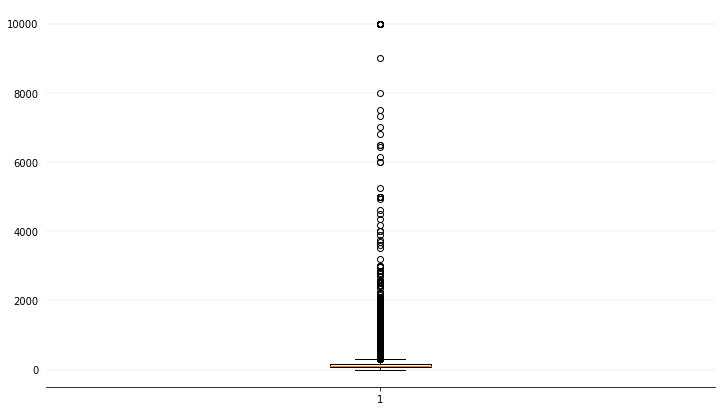

In [98]:
fig, ax = plt.subplots(figsize=(12, 7))
# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Remove y-axis tick marks
ax.yaxis.set_ticks_position('none')
# Add major gridlines in the y-axis
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
ax.boxplot(dataset_onehot1["price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c7af89790>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2f110250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2f104710>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2b396590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2b396c10>],
 'means': []}

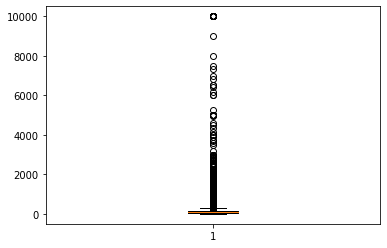

In [99]:
plt.boxplot(dataset_onehot1["price"], notch=None, vert=None, patch_artist=None, widths=None)

In [100]:
data['price'].corr(data['amenities_wgt_score'])

-0.0356643492026193

In [101]:
X2 = sm.add_constant(x_train1)
est = sm.OLS(y_train1, X2)
est2 = est.fit()
print(est2.summary())

/Users/ashutoshshanker/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     133.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:13:38   Log-Likelihood:            -2.2969e+05
No. Observations:               32019   AIC:                         4.594e+05
Df Residuals:                   31996   BIC:                         4.596e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [102]:
data["binned_price"].value_counts()

<=100    23956
>100     21786
Name: binned_price, dtype: int64

In [103]:
data[['amenities','amenities_wgt_score']].head(20)

,amenities,amenities_wgt_score
0,"[""Iron"", ""Cleaning before checkout"", ""Extra pi...",23750.0
1,"[""Iron"", ""Extra pillows and blankets"", ""Smoke ...",23338.0
2,"[""Air conditioning"", ""Kitchen"", ""Wifi"", ""Heati...",41941.0
3,"[""Carbon monoxide alarm"", ""Dryer"", ""Cable TV"",...",33032.0
4,"[""Refrigerator"", ""Iron"", ""Extra pillows and bl...",27409.0
5,"[""Laptop-friendly workspace"", ""Carbon monoxide...",27979.0
6,"[""Iron"", ""Smoke alarm"", ""Stove"", ""Coffee maker...",27514.0
7,"[""Iron"", ""Waterfront"", ""Smoke alarm"", ""Stove"",...",27540.0
8,"[""Iron"", ""Smoke alarm"", ""Lockbox"", ""Beach esse...",25959.0
9,"[""Refrigerator"", ""Carbon monoxide alarm"", ""Hea...",26383.0
